# Linkage Attack

This is an intractive way of the professor seing what I've done. Beind honest its pretty much simple and I've got two charts at the end c:

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Read data and print some info

In [3]:
data     = pd.read_csv("./data/sti_data.csv")
marriage = pd.read_csv("./data/marriage_data.csv")
earnings = pd.read_csv('./data/earnings_data.csv')

In [4]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24255 entries, 0 to 24254
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date of Birth     24255 non-null  object
 1   Postal Code       24255 non-null  int64 
 2   Education Status  24255 non-null  int64 
 3   Chlamydia         24255 non-null  bool  
 4   Gonorrhea         24255 non-null  bool  
 5   Syphilis          24255 non-null  bool  
dtypes: bool(3), int64(2), object(1)
memory usage: 639.7+ KB


,Date of Birth,Postal Code,Education Status,Chlamydia,Gonorrhea,Syphilis
0,07/09/1967,2187,13,False,False,False
1,07/06/1988,1357,13,False,False,False
2,06/08/1991,1321,9,False,False,False
3,06/04/2009,1317,7,False,False,False
4,16/09/1951,2628,13,False,False,False


In [44]:
marriage.info()
marriage.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   NIF             1010 non-null   int64 
 1   Postal Code     1010 non-null   int64 
 2   Occupation      950 non-null    object
 3   Marital Status  1010 non-null   object
dtypes: int64(2), object(2)
memory usage: 31.7+ KB


,NIF,Postal Code,Occupation,Marital Status
0,987190907,1825,Exec-managerial,Married-civ-spouse
1,914474386,2768,Machine-op-inspct,Never-married
2,826060001,1988,Other-service,Married-civ-spouse
3,881353865,2733,Other-service,Never-married
4,925715401,1947,Prof-specialty,Never-married


In [39]:
earnings.info()
earnings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32563 entries, 0 to 32562
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date of Birth     32563 non-null  object
 1   Education Status  32563 non-null  int64 
 2   Occupation        30720 non-null  object
 3   Earnings          32563 non-null  object
dtypes: int64(1), object(3)
memory usage: 1017.7+ KB


,Date of Birth,Education Status,Occupation,Earnings
0,07/09/1967,13,Adm-clerical,<=50K
1,07/06/1988,13,Exec-managerial,<=50K
2,06/08/1991,9,Handlers-cleaners,<=50K
3,06/04/2009,7,Handlers-cleaners,<=50K
4,16/09/1951,13,Prof-specialty,<=50K


## 2. Do the actual attack

In [7]:
linked = pd.merge(
    marriage, pd.merge(data, earnings, on = ['Date of Birth', 'Education Status' ], how = 'outer' ), # join marriage and earnings on 'Date of Birth' and 'Education Status'
    on = ['Postal Code', 'Occupation'], how = 'inner' # Then join the result of the previous with this on 'Postal Code' and 'Occupation'
)

## 3. Print statistics for sucess rate

In [14]:
linked.info()
linked.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2487 entries, 0 to 2486
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NIF               2487 non-null   int64 
 1   Postal Code       2487 non-null   int64 
 2   Occupation        2380 non-null   object
 3   Marital Status    2487 non-null   object
 4   Date of Birth     2487 non-null   object
 5   Education Status  2487 non-null   int64 
 6   Chlamydia         2487 non-null   object
 7   Gonorrhea         2487 non-null   object
 8   Syphilis          2487 non-null   object
 9   Earnings          2487 non-null   object
dtypes: int64(3), object(7)
memory usage: 194.4+ KB


,NIF,Postal Code,Occupation,Marital Status,Date of Birth,Education Status,Chlamydia,Gonorrhea,Syphilis,Earnings
0,987190907,1825,Exec-managerial,Married-civ-spouse,02/08/2001,14,False,False,False,<=50K
1,987190907,1825,Exec-managerial,Married-civ-spouse,16/02/2009,10,False,False,False,>50K
2,987190907,1825,Exec-managerial,Married-civ-spouse,23/08/1992,10,False,False,False,<=50K
3,826060001,1988,Other-service,Married-civ-spouse,06/09/1957,7,False,False,False,<=50K
4,826060001,1988,Other-service,Married-civ-spouse,07/02/1987,11,False,False,False,<=50K


### 3.1 Information about Identified NIFs

In [20]:
nif_occurences = linked['NIF'].value_counts()

Text(0.5, 0, 'Number of rows the NIF appeared')

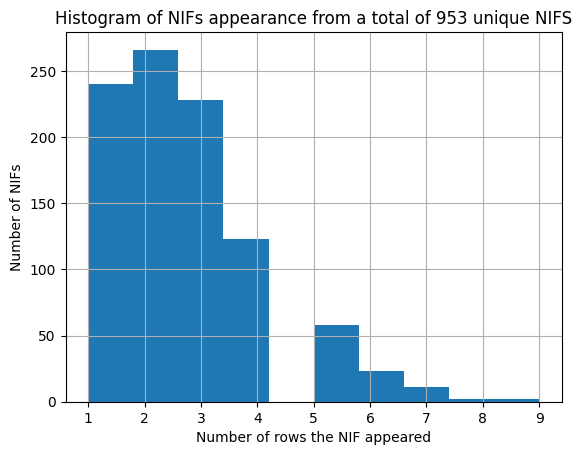

In [36]:
nif_occurences.hist()

plt.title('Histogram of NIFs appearance from a total of %d unique NIFS' % (linked['NIF'].nunique(),))
plt.ylabel('Number of NIFs')
plt.xlabel('Number of rows the NIF appeared')

Text(0.5, 1.0, "CDF's distribuition of the chart above")

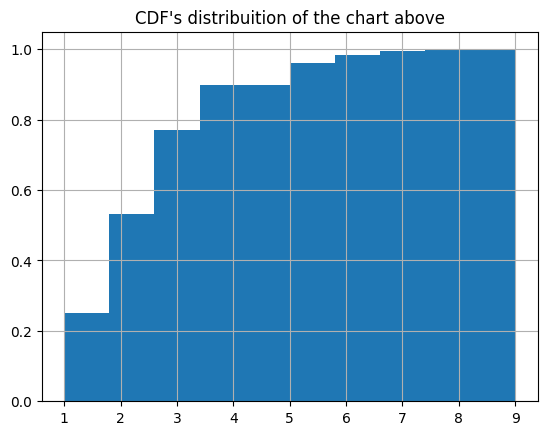

In [37]:
nif_occurences.hist(cumulative=True, density=1)
plt.title("CDF's distribuition of the chart above")

### Final Stats

In [62]:
original_size       = marriage['NIF'].value_counts().size
unique_individuals  = nif_occurences[ nif_occurences == 1].size
success             = nif_occurences[ nif_occurences <= 3].size


print('Original NIF number                                  :', original_size)
print('Uniquely identified NIFs                              : %d (%.2f%%) '  % (unique_individuals, unique_individuals / original_size * 100) )
print('Successfully identified NIFs (occurrence of NIF <= 3) : %d (%.2f%%)' % (success, success / original_size * 100) )


Original NIF number                                  : 1010
Uniquely identified NIFs                              : 240 (23.76%) 
Successfully identified NIFs (occurrence of NIF <= 3) : 734 (72.67%)


In [65]:
nif_occurences[ nif_occurences == 1].index.to_list()

[703854063,
 864621858,
 840003213,
 713256216,
 715450359,
 929958504,
 963993964,
 732476936,
 715789809,
 974968812,
 736079542,
 981289971,
 895969948,
 893547076,
 701701280,
 957586002,
 810243039,
 723629782,
 945121873,
 901228648,
 971578171,
 804794575,
 888282588,
 840750915,
 960805396,
 823986920,
 770665267,
 843062199,
 727753017,
 934207972,
 759145759,
 882222283,
 701256932,
 933916716,
 730743553,
 973771582,
 845143067,
 795008644,
 823935172,
 802239243,
 966686037,
 793449205,
 769432930,
 733712724,
 734271091,
 768689776,
 912157320,
 834444196,
 762875016,
 807646882,
 704746366,
 832156128,
 985427128,
 923402614,
 834914116,
 793479995,
 914291993,
 940232528,
 910951311,
 891207517,
 830274109,
 718686062,
 941530052,
 700228374,
 905383062,
 896354225,
 958550513,
 742736472,
 822581802,
 902628534,
 839649264,
 703492478,
 800083550,
 889372266,
 769758425,
 924536443,
 941035086,
 771606023,
 994208428,
 795578515,
 834001806,
 718093690,
 720894718,
 982